In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sklearn
import sklearn.cluster
import sklearn.decomposition
import sklearn.manifold
import sklearn.model_selection
import seaborn as sns

import sys
sys.path.insert(0, '../')
import NEU_utils


In [2]:
with open('fc1_features.pickle', 'rb') as f:
    data = pickle.load(f)
labels = [x[:2] for x in data['filename']]

In [3]:
n_pca = 20
pca_nw = sklearn.decomposition.PCA(n_components=n_pca, svd_solver='full', whiten=False)
pca_w = sklearn.decomposition.PCA(n_components=n_pca, svd_solver='full', whiten=True)

x_pca_nw = pca_nw.fit_transform(data['fc1'])
x_pca_w = pca_w.fit_transform(data['fc1'])

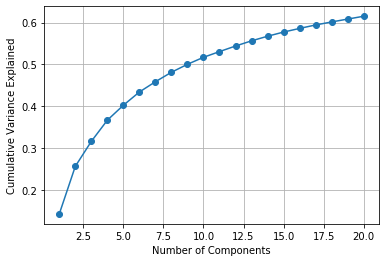

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1,n_pca+1), pca_nw.explained_variance_ratio_.cumsum(), '-o')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Variance Explained')
ax.grid(which='both')
plt.show()

In [5]:
labels_numeric = np.asarray([NEU_utils.label_mapper[x] for x in labels])

In [6]:
kfold = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=2332)
splits = kfold.split(x_pca_w)
traintestacc = []
for train, test in splits:
    Xtrain = x_pca_w[train]
    Xval = x_pca_w[test]
    
    Ytrain = labels_numeric[train]
    Yval = labels_numeric[test]

    
    kmeans = sklearn.cluster.KMeans(n_clusters=7, init='k-means++', n_init=500, n_jobs=-1)
    kmeans.fit(Xtrain)
    
    labels_train = kmeans.labels_
    labels_val = kmeans.predict(Xval)
    

    files_train = [labels[i] for i in train]
    files_val = [labels[i] for i in test]
    
    Ypred_train = NEU_utils.file_matcher(labels_train, files_train, NEU_utils.label_mapper)
    Ypred_val = NEU_utils.file_matcher(labels_val, files_val, NEU_utils.label_mapper)
    
    trainacc = (Ypred_train == Ytrain).sum()/len(Ytrain)
    valacc = (Ypred_val == Yval).sum()/len(Yval)
    traintestacc.append([trainacc, valacc])

In [7]:
print('PCA 50 components + whitening')
print('Train Accuracy\t\tValidation Accuracy')
for row in traintestacc:
    print("{:.5f}\t\t\t{:.5f}".format(row[0], row[1]))

PCA 50 components + whitening
Train Accuracy		Validation Accuracy
0.98611			0.98889
0.98681			0.97778
0.98403			0.98889
0.98403			0.99167
0.98542			0.98056


In [8]:
pca_w50 = sklearn.decomposition.PCA(n_components=50, svd_solver='full', whiten=True)

x_pca_w50 = pca_w50.fit_transform(data['fc1'])


kfold = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=42224)
splits = kfold.split(x_pca_w50)
traintestacc = []
for train, test in splits:
    Xtrain = x_pca_w50[train]
    Xval = x_pca_w50[test]
    
    Ytrain = labels_numeric[train]
    Yval = labels_numeric[test]

    
    kmeans = sklearn.cluster.KMeans(n_clusters=7, init='k-means++', n_init=500, n_jobs=-1)
    kmeans.fit(Xtrain)
    
    labels_train = kmeans.labels_
    labels_val = kmeans.predict(Xval)
    

    files_train = [labels[i] for i in train]
    files_val = [labels[i] for i in test]
    
    Ypred_train = NEU_utils.file_matcher(labels_train, files_train, NEU_utils.label_mapper)
    Ypred_val = NEU_utils.file_matcher(labels_val, files_val, NEU_utils.label_mapper)
    
    trainacc = (Ypred_train == Ytrain).sum()/len(Ytrain)
    valacc = (Ypred_val == Yval).sum()/len(Yval)
    traintestacc.append([trainacc, valacc])

print('PCA 50 components + whitening')
print('Train Accuracy\t\tValidation Accuracy')
for row in traintestacc:
    print("{:.5f}\t\t\t{:.5f}".format(row[0], row[1]))

PCA 50 components + whitening
Train Accuracy		Validation Accuracy
0.96319			0.97778
0.98264			0.98333
0.97708			0.97222
0.98472			0.99444
0.99236			0.98333
